# B ) Region based segmentation  

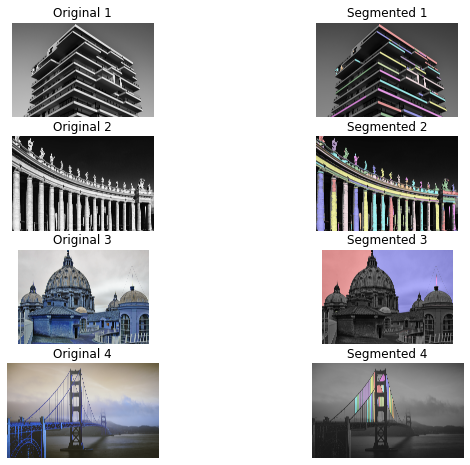

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import segmentation
from skimage.filters import sobel
from scipy import ndimage
from skimage.color import label2rgb

# a function display images in a single figure
def display_images(figure_size, rows, cols, images_raw, titles, greyscale=True):
    images=[]
    if greyscale:
        images= images_raw
    else:
        for image in images_raw:
            images.append(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    fig = plt.figure(figsize=figure_size) #creating a figure

    # add subplots inside the figure so that we can see preview all the images at once
    for i in range(0, len(images)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(images[i], cmap='gray')# Shows an image
        plt.title(titles[i])
        plt.axis('off')

def region_based_segmentation(image):
    #converting image to greyscale
    im  = image[:,:, 0]

    #to extract the elevation map
    e_map = sobel(im)
    regions = np.zeros_like(im)
    #creating regions
    #The best values for treshold could be found out by plotting the histogram and getting extreme parts
    regions[im < 120] = 1
    regions[im > 230] = 2
    #doing watershed image transformation for segmentation
    #src->source -image
    #markers -> The desired no. of markers in the image
    segmentation = skimage.segmentation.watershed(e_map, regions)
    segmentation = ndimage.binary_fill_holes(segmentation-1)
    labeled, _  = ndimage.label(segmentation)
    image_label_overlay = label2rgb(labeled, im)
    return image_label_overlay

# Load the four original images
img1 = cv2.imread('photo1.jpg')
img2 = cv2.imread('photo2.jpg')
img3 = cv2.imread('photo3.jpg')
img4 = cv2.imread('photo4.jpg')

# segment the images
segmented_images = []
for img in [img1, img2, img3, img4]:
    segmented_images.append(region_based_segmentation(img))

# display the original and segmented images side by side
titles = ['Original 1', 'Segmented 1', 'Original 2', 'Segmented 2', 'Original 3', 'Segmented 3', 'Original 4', 'Segmented 4']
display_images((10, 8), 4, 2, [img1, segmented_images[0], img2, segmented_images[1], img3, segmented_images[2], img4, segmented_images[3]], titles)
